# Hypsometry of Earth and Mars

**Bodo Bookhagen**

*Note: For the interested or advanced user: The ETOPO5 data can be downloaded at: [ETOPO5](http://www.ngdc.noaa.gov/mgg/global/relief/ETOPO5/TOPO/ETOPO5/) and information about the data can be obtained [here](http://www.ngdc.noaa.gov/mgg/fliers/93mgg01.html). Note that there is a new, high resolution dataset available [globally](http://www.ngdc.noaa.gov/mgg/global/global.html). But these data, however, are too large to perform fast calculations on them. Once you have downloaded the data, you can view them with ENVI or ArcMAP. I have used ENVI, to import the data with the following parameters (saved in the header file): Samples: 4320, Lines: 2160, Data Type: Integer, Byte Order: Network (IEEE). You can save the file as a Tif/Geotiff and import it into Matlab using either the command importdata(‘ETOPO5.TIF’) or the using the menu File->Import data... ]*

*Alternatively, you can download a geotiff version of the [ETOPO5-geotiff](http://www.eea.europa.eu/data-and-maps/data/world-digital-elevation-model-etopo5).*

Obtain information about the DEM file with gdal. On the command line, you can use:
```bash
gdalinfo DEM_geotiff/alwdgg.tif | more
```

and you will obtain:
```bash
Driver: GTiff/GeoTIFF
Files: DEM_geotiff/alwdgg.tif
       DEM_geotiff/alwdgg.aux
       DEM_geotiff/alwdgg.tif.rrd
Size is 4320, 2160
Coordinate System is:
GEOGCS["Clarke_1866",
    DATUM["Clarke_1866",
        SPHEROID["Clarke 1866",6378206.4,294.9786982138982]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433]]
Origin = (-179.999994914978743,90.000002544373274)
Pixel Size = (0.083333335816860,-0.083333335816860)
Metadata:
  AREA_OR_POINT=Area
  TIFFTAG_RESOLUTIONUNIT=1 (unitless)
  TIFFTAG_SOFTWARE=IMAGINE TIFF Support
Copyright 1991 - 1999 by ERDAS, Inc. All Rights Reserved
@(#)$RCSfile: etif.c $ $Revision: 1.9.1.2 $ $Date: 2001/12/05 00:33:12Z $
  TIFFTAG_XRESOLUTION=1
  TIFFTAG_YRESOLUTION=1
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-179.9999949,  90.0000025) (179d59'59.98"W, 90d 0' 0.01"N)
Lower Left  (-179.9999949, -90.0000028) (179d59'59.98"W, 90d 0' 0.01"S)
Upper Right ( 180.0000158,  90.0000025) (180d 0' 0.06"E, 90d 0' 0.01"N)
Lower Right ( 180.0000158, -90.0000028) (180d 0' 0.06"E, 90d 0' 0.01"S)
Center      (   0.0000104,  -0.0000001) (  0d 0' 0.04"E,  0d 0' 0.00"S)
Band 1 Block=4320x1 Type=Int16, ColorInterp=Gray
  Description = alwdgg
  Min=-10376.000 Max=7833.000 
  Minimum=-10376.000, Maximum=7833.000, Mean=-1895.840, StdDev=2658.686
  Overviews: 1078x538, 538x268, 268x133, 133x65, 65x31
  Metadata:
    LAYER_TYPE=athematic
    STATISTICS_MAXIMUM=7833
    STATISTICS_MEAN=-1895.8397216797
    STATISTICS_MINIMUM=-10376
    STATISTICS_STDDEV=2658.6857910156
```

We note that no nodata value has been assign. We also see the projection information and pixel size. Next, Load data into Python and display. Here we use [richDEM](https://richdem.readthedocs.io/en/latest/index.html) and [rd.LoadGDAL](https://richdem.readthedocs.io/en/latest/loading_data.html). **NOTE: richDEM will not run on Windows OS, so we will use a gdal to read the geotiff files.** See [gdal](https://gdal.org/) and the [Python API](https://gdal.org/python/index.html) directly. 


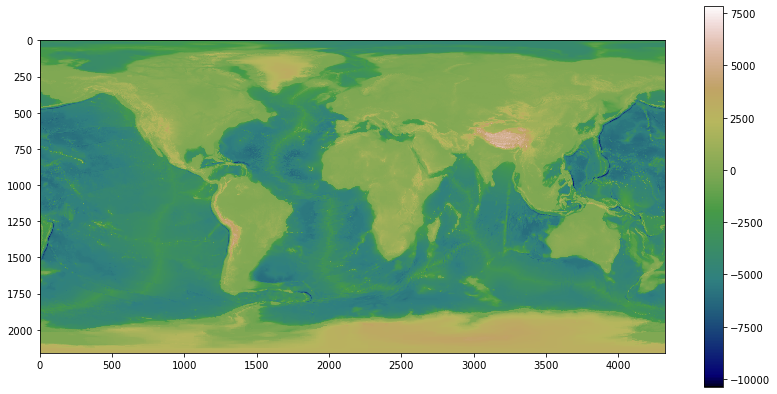

In [5]:
#import richdem as rd
#earth_dem = rd.LoadGDAL(earth_dem_fname, no_data=-32678)
#richdem not running on Windows systems, use gdal instead
#conda install gdal

import numpy as np
from matplotlib import pyplot as pl
#pl.rcParams['figure.figsize'] = [14, 7]

from osgeo import gdal
earth_dem_fname='alwdgg.tif'
#'C:\\Windows\\Directory'
ds = gdal.Open(earth_dem_fname, gdal.GA_ReadOnly)
rb = ds.GetRasterBand(1)
earth_dem = rb.ReadAsArray()

pl.imshow(earth_dem, interpolation='none', cmap='gist_earth')
pl.colorbar()
pl.show()

**Question: Plot a profile across the equator**

We can obtain a histogram (hypsometry) of Earth using [np.hist](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) or directly with [matplotlib.pyplot.hist](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html).

A simple histogram using 100 equally-spaced bins (hypsometry of Earth):

Text(0, 0.5, 'Number of pixels')

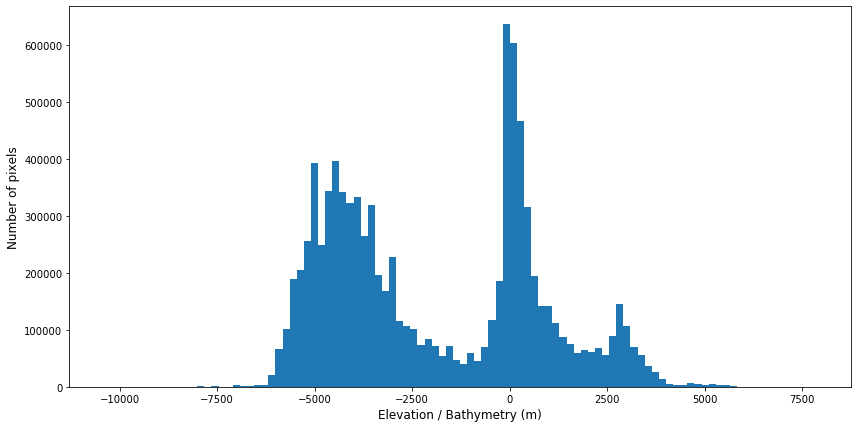

In [7]:
pl.hist(earth_dem.ravel(), bins=100)
pl.xlabel('Elevation / Bathymetry (m)', fontsize=12)
pl.ylabel('Number of pixels', fontsize=12)

**Question: Change the binning parameters to obtain bins spaced in 250-m elevation slices**


**Question: We have used a geographic projection system. This is distorted at the higher latitude. It will be more useful to have an equal-area projection such as Mollweide. Either use 'gdal' to convert the projection or load the data contained in `ETOPO5_dem_mollweide_geotiff.zip`. Make sure to properly assign the nodata value and repeat the binning analysis (results with not be very different, but more accurate.**

Text(0, 0.5, 'Number of pixels')

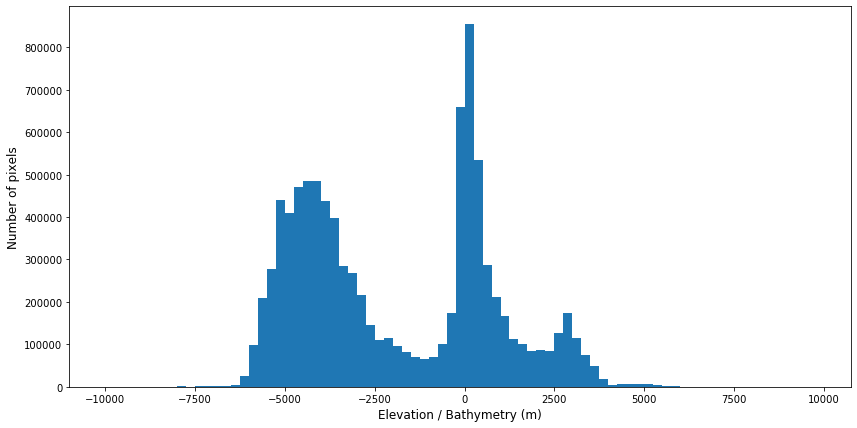

In [8]:
bins_250m = np.arange(-10000,10000, 250)
pl.hist(earth_dem.ravel(), bins=bins_250m)
pl.xlabel('Elevation / Bathymetry (m)', fontsize=12)
pl.ylabel('Number of pixels', fontsize=12)


# Hypsometry of Mars
Next, we load a DEM of Mars.
There is a high resolution [MARS MOLA DEM](https://www.dropbox.com/s/gaz20s8y4ypourb/MARS_MOLA128_1000m_bilinear.zip?dl=0) available (1000 m spatial resolution) that I prepared. But this is of high resolution and the analysis performed on this file may take a little longer. Instead, we will rely on a 5000m DEM of Mars `mola128_mola64_merge_90Nto90S_SimpleC_clon0_5000m_bilinear.tif`. But feel free to experiment with other resolution data.
Again, we first obtain information about the geotiff file:

```bash
gdalinfo mola128_mola64_merge_90Nto90S_SimpleC_clon0_5000m_bilinear.tif
```

with the following output:
```bash
Driver: GTiff/GeoTIFF
Files: mola128_mola64_merge_90Nto90S_SimpleC_clon0_5000m_bilinear.tif
Size is 4268, 2134
Coordinate System is:
PROJCS["Mars2000_ECylindrical_clon0",
    GEOGCS["GCS_Mars_2000_Sphere",
        DATUM["Mars_2000_Sphere",
            SPHEROID["Mars_2000_Sphere",3396190,0]],
        PRIMEM["Reference_Meridian",0],
        UNIT["degree",0.0174532925199433]],
    PROJECTION["Equirectangular"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",0],
    PARAMETER["standard_parallel_1",0],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]]]
Origin = (-10669677.095995118841529,5334954.318897561170161)
Pixel Size = (5000.000000000000000,-5000.000000000000000)
Metadata:
  AREA_OR_POINT=Area
  DataType=Generic
Image Structure Metadata:
  COMPRESSION=DEFLATE
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-10669677.096, 5334954.319) (179d59'45.94"E, 90d 0'14.06"N)
Lower Left  (-10669677.096,-5335045.681) (179d59'45.94"E, 90d 0'19.61"S)
Upper Right (10670322.904, 5334954.319) (179d59' 6.71"W, 90d 0'14.06"N)
Lower Right (10670322.904,-5335045.681) (179d59' 6.71"W, 90d 0'19.61"S)
Center      (     322.904,     -45.681) (  0d 0'19.61"E,  0d 0' 2.77"S)
Band 1 Block=4268x1 Type=Int16, ColorInterp=Gray
  NoData Value=-32768
```

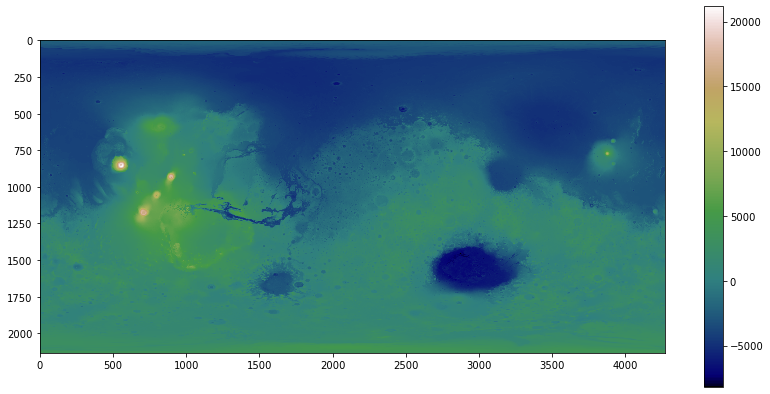

In [6]:
mars_dem_fname='/home/bodo/Dropbox/Teaching/IITGn-QuantGeomorph_2020/github/Earth/mola128_mola64_merge_90Nto90S_SimpleC_clon0_5000m_bilinear.tif'
#mars_dem = rd.LoadGDAL(mars_dem_fname, no_data=-32768)

ds = gdal.Open(mars_dem_fname, gdal.GA_ReadOnly)
rb = ds.GetRasterBand(1)
mars_dem = rb.ReadAsArray()
pl.imshow(mars_dem, interpolation='none', cmap='gist_earth')
pl.colorbar()
pl.show()

**Question: What geomorphic/tectonic features do you observe on Mars?**

**Question: Calculate the hypsometry of Mars and make one plot that combines Earth's and Mars' Hypsometries. Why are they different?**

**Question: Compare the slope distribution of Mars and Moon. How and why are these different?**

You can either use the numerical slope function we have created before or you use the [Terrainattributes function](https://richdem.readthedocs.io/en/latest/terrain_attributes.html) included in [richDEM](https://richdem.readthedocs.io/en/latest/index.html). For example:
```Python
slope = rd.TerrainAttribute(mars_dem, attrib='slope_riserun')
rd.rdShow(slope, axes=False, cmap='magma', figsize=(8, 5.5))
plt.show()
```

**Question: A lot of information is contained in 2D histogram. You can evaluate slope and elevation (i.e., what slope dominates at what elevation) using a 2D kernel density estimator. See [here](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.gaussian_kde.html).**

**Question: The directory contains a DEM of Moon - load this and calculated hypsometry as well**